In [1]:
from collections import deque
import time
import matplotlib.pyplot as plt
import networkx as nx

1. загрузили матрицу смежности графа

In [2]:
graph = [
[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
]

 2.Реализовать обход графа в ширину и в глубину в виде функций на питоне.

In [3]:
def dfs(graph, node, visited):
    visited[node] = True
    result = [node] 
    for i, value in enumerate(graph[node]):
        if value == 1 and not visited[i]:
            result += dfs(graph, i, visited)
    return result
visited = [False] * len(graph)
dfs(graph, 0, visited)

[0, 5, 2, 1, 3, 4, 8, 7, 12, 17, 9, 13, 16, 6, 10, 14, 19, 18, 11, 15]

In [4]:
def bfs(graph, start):
    visited = set()
    queue = [start]
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.add(node)
            queue.extend(i for i, value in enumerate(graph[node]) if value == 1 and i not in visited)
    return visited

In [5]:
def dfs(graph, start):
    visited = set()
    stack = [start]

    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            stack.extend(i for i, value in enumerate(graph[node]) if value == 1 and i not in visited)
    return visited

3. Сравнили скорость нахождения обоими поисками: две самых больших по номеру вершины и привести пути к ним в виде списка.

In [6]:
def measure_execution_time(algorithm, graph, start_node):
    start_time = time.time()
    result = algorithm(graph, start_node)
    end_time = time.time()
    execution_time = end_time - start_time
    return result, execution_time


In [7]:
if __name__ == "__main__":
    graph = [
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
    ]

    start_node = 0

# BFS
    bfs_result, bfs_execution_time = measure_execution_time(bfs, graph, start_node)
    print(f"BFS Result: {bfs_result}")
    print(f"BFS Execution Time: {bfs_execution_time:.6f} seconds")

# DFS
    dfs_result, dfs_execution_time = measure_execution_time(dfs, graph, start_node)
    print(f"DFS Result: {dfs_result}")
    print(f"DFS Execution Time: {dfs_execution_time:.6f} seconds")

BFS Result: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
BFS Execution Time: 0.000000 seconds
DFS Result: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
DFS Execution Time: 0.000000 seconds


Скорость выполнения обоих алгоритмов высокая для малых вычичслений, как в нашем примере, поэтому время выполнения в обоих случаях стремится к 0.

4. Выяснить существуют ли библиотеки в Питоне, позволяющие использовать поиск в ширину и глубину "из коробки". 

библиотека NetworkX предоставляет удобные методы для работы с графами, включая обходы в ширину и в глубину.

5.

In [8]:
def plot_execution_times(graph, start_nodes):
    bfs_execution_times = []
    dfs_execution_times = []

    for start_node in start_nodes:
        _, bfs_time = measure_execution_time(bfs, graph, start_node)
        _, dfs_time = measure_execution_time(dfs, graph, start_node)

        bfs_execution_times.append(bfs_time)
        dfs_execution_times.append(dfs_time)

    plt.plot(start_nodes, bfs_execution_times, label='BFS')
    plt.plot(start_nodes, dfs_execution_times, label='DFS')
    plt.xlabel('Starting Node')
    plt.ylabel('Execution Time (s)')
    plt.title('BFS and DFS Execution Times')
    plt.legend()
    plt.show()

    # BFS
    bfs_result, bfs_execution_time = measure_execution_time(bfs, graph, start_node)
    print(f"BFS Result: {bfs_result}")
    print(f"BFS Execution Time: {bfs_execution_time:.6f} seconds")

    # DFS
    dfs_result, dfs_execution_time = measure_execution_time(dfs, graph, start_node)
    print(f"DFS Result: {dfs_result}")
    print(f"DFS Execution Time: {dfs_execution_time:.6f} seconds")


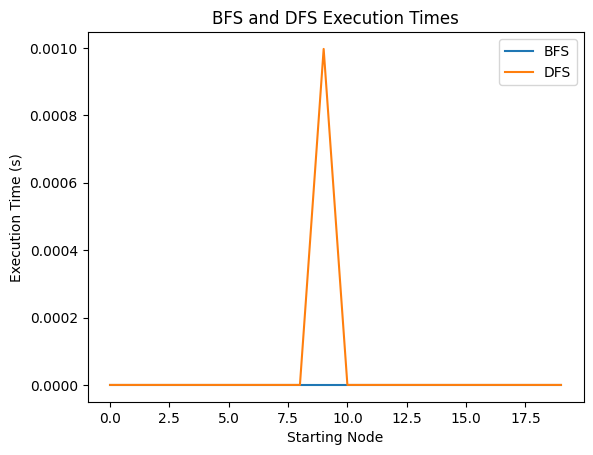

In [9]:
def plot_execution_times(graph, start_nodes):
    bfs_execution_times = []
    dfs_execution_times = []

    for start_node in start_nodes:
        _, bfs_time = measure_execution_time(bfs, graph, start_node)
        _, dfs_time = measure_execution_time(dfs, graph, start_node)

        bfs_execution_times.append(bfs_time)
        dfs_execution_times.append(dfs_time)

    plt.plot(start_nodes, bfs_execution_times, label='BFS')
    plt.plot(start_nodes, dfs_execution_times, label='DFS')
    plt.xlabel('Starting Node')
    plt.ylabel('Execution Time (s)')
    plt.title('BFS and DFS Execution Times')
    plt.legend()
    plt.show()

num_nodes = len(graph)
start_nodes = list(range(num_nodes))

plot_execution_times(graph, start_nodes)

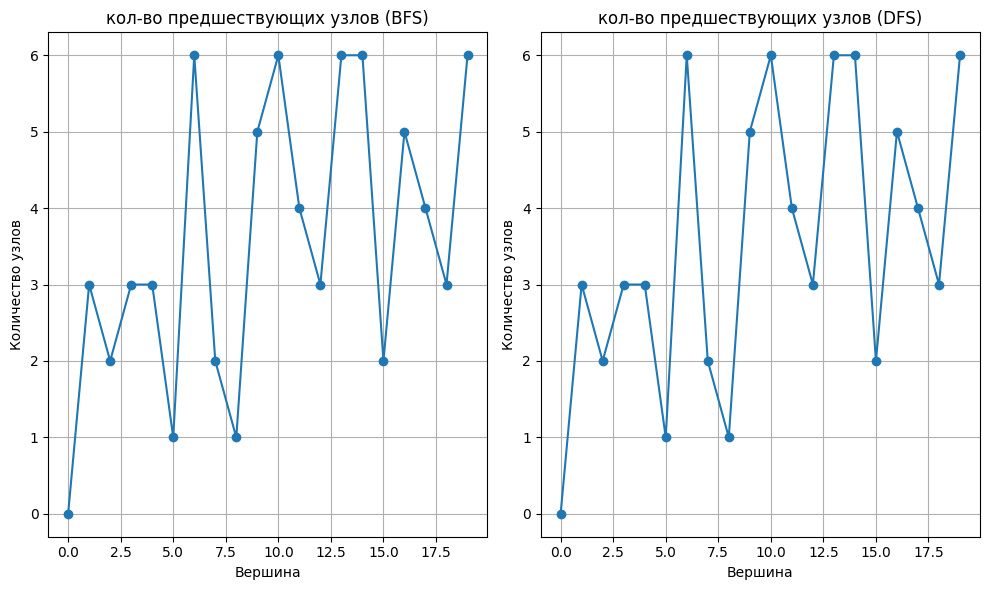

In [10]:
import numpy as np

graph

bfs_order = bfs_result
dfs_order = dfs_result

G = nx.Graph()

for i in range(len(graph)):
    G.add_node(i)
    for j in range(i + 1, len(graph[i])):
        if graph[i][j] == 1:
            G.add_edge(i, j)

bfs_counts = []
dfs_counts = []

for node in sorted(bfs_order):
    bf = nx.single_source_shortest_path_length(G, source=0)
    count = bf.get(node, np.inf)
    bfs_counts.append(count)

for node in sorted(dfs_order):
    df = nx.shortest_path(G, source=0, target=node)
    count = len(df) - 1  
    dfs_counts.append(count)

plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(sorted(bfs_order), bfs_counts, marker='o')
plt.xlabel('Вершина')
plt.ylabel('Количество узлов')
plt.title('кол-во предшествующих узлов (BFS)')
plt.grid(True)

plt.subplot(122)
plt.plot(sorted(dfs_order), dfs_counts, marker='o')
plt.xlabel('Вершина')
plt.ylabel('Количество узлов')
plt.title('кол-во предшествующих узлов (DFS)')
plt.grid(True)

plt.tight_layout()
plt.show()